In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random 
import re
from scipy import spatial
%matplotlib inline
import math 
import ast 
from collections import Counter 
import nltk
from operator import itemgetter 
nltk.download('wordnet')
from scipy.spatial import distance
import sys
import itertools
from itertools import permutations 
import pylab
from textblob import TextBlob
import itertools as it
import time as time1
from tqdm import tqdm
import random
import pickle as pk
import multiprocessing
nltk.download('punkt')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sepidehnikookar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sepidehnikookar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     /Users/sepidehnikookar/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sepidehnikookar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sepidehnikookar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
rating = pd.read_csv("paris_rating.csv" , names=["id" , "Score"]) 

POI=rating["id"].tolist()
rating.head()

,id,Score
0,111 front street,0.0
1,abingdon sq,0.0
2,abyssinian baptist church,4.4
3,american museum of natural history,4.6
4,battery park,4.6


In [37]:
time = pd.read_csv("paris_tt.csv") 
time.head()

,id,111 front street,abingdon sq,abyssinian baptist church,american museum of natural history,battery park,bowling green,bridgemarket,brooklyn bridge,bryant park,...,trinity church,union sq,united nations,washington mews,washington sq park,whitney museum of american art,wildlife center,wollman skating rink,world trade center site,yankee stadium
0,111 front street,0,16,23,26,8,10,14,3,17,...,8,19,12,16,15,16,27,21,10,24
1,abingdon sq,19,0,28,20,15,16,18,14,10,...,15,8,17,7,7,7,21,16,16,27
2,abyssinian baptist church,25,30,0,22,22,23,15,20,21,...,25,26,16,26,26,26,19,23,23,10
3,american museum of natural history,25,22,18,0,21,23,14,19,14,...,25,20,16,21,21,18,5,7,23,19
4,battery park,10,11,22,25,0,4,12,5,15,...,4,17,10,14,13,12,26,20,4,22


In [38]:
visit_time = pd.read_csv("paris_visittime.csv" , names=["id" ,"Type", "time"]) 
visit_time.head()

,id,Type,time
0,111 front street,street_address,1.0
1,abingdon sq,route,1.0
2,abyssinian baptist church,church,1.5
3,american museum of natural history,museum,3.0
4,battery park,park,1.5


In [39]:
Type = pd.read_csv("paris_types.csv", names=["id" , "Type"]) 
Type.head()

,id,Type
0,111 front street,street_address
1,abingdon sq,route
2,abyssinian baptist church,church
3,american museum of natural history,museum
4,battery park,park


In [40]:
goal=pd.read_csv("paris_datawithtypes.csv", names=["POIs" , "Types"]) 
goal.head()

,POIs,Types
0,empire state building,museum
1,"cathedral of st john the divine,staten island ...","church,route,museum"
2,"radio city music hall,rockefeller center,pierp...","establishment,establishment,museum"
3,new york university,university
4,union sq,political


In [41]:
Distances = pd.read_csv("paris_output.csv") 
Distances.head()

,id,111 front street,abingdon sq,abyssinian baptist church,american museum of natural history,battery park,bowling green,bridgemarket,brooklyn bridge,bryant park,...,trinity church,union sq,united nations,washington mews,washington sq park,whitney museum of american art,wildlife center,wollman skating rink,world trade center site,yankee stadium
0,111 front street,0.0,3.5,11.6,9.1,2.8,2.3,6.8,0.4,6.5,...,2.1,4.0,5.8,3.5,3.0,4.1,10.4,7.9,3.5,12.6
1,abingdon sq,3.9,0.0,8.1,3.7,3.4,2.8,4.3,2.4,1.9,...,2.6,1.0,2.9,0.9,0.9,1.0,5.8,3.1,3.4,11.6
2,abyssinian baptist church,11.8,9.2,0.0,3.5,11.0,11.1,5.4,10.4,7.0,...,11.3,8.4,6.6,8.7,8.7,12.0,3.2,4.1,11.7,1.7
3,american museum of natural history,9.3,4.8,3.2,0.0,8.4,8.5,2.4,7.8,3.0,...,8.7,4.0,4.0,4.3,4.3,4.5,0.7,1.2,9.2,8.4
4,battery park,3.1,2.6,11.0,8.5,0.0,0.4,6.2,1.6,5.9,...,0.6,3.0,5.2,2.5,2.3,3.1,9.9,7.3,0.8,12.0


In [42]:
def cellValue(df,rowName, columnName):
    
    index=df[df["id"]==rowName].index.values[0]

    return df.iloc[index][columnName]

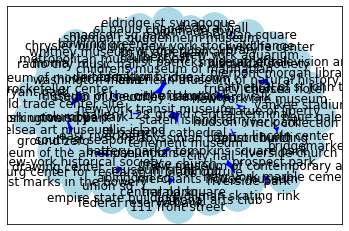

In [43]:
#Create graph
edges=[]
for i in POI:
    poi=POI[:]
    poi.remove(i)
    for j in poi:
        edges.append((i,j))


G = nx.Graph()
G.add_edges_from(edges) 
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos, cmap=plt.get_cmap('jet'),node_size = 1000,node_color="lightblue")
nx.draw_networkx_edges(G,pos,edge_color='b', edge_cmap=plt.cm.Blues,arrows=True,arrowstyle="->",arrowsize=10)
nx.draw_networkx_labels(G,pos)

plt.show()

In [44]:
def visitTime(seq):
    
    total=0
    for i in seq:
        
        total+=int(cellValue(visit_time ,i, "time"))
        
    return total

In [45]:
def commuteTime(seq):
    
    total=0

    for i in range(len(seq)-1):

        total+=int(cellValue(time ,seq[i], seq[i+1]))
        
    return total/60

In [46]:
movies = list(G.nodes())

movie_ids={}
for i,node in enumerate(G.nodes()):
    movie_ids[node]=i


In [47]:
#creating the topic dictonary with key as course name and topic as value
topic_dict={}

for i in range(len(POI)):
    topic_dict[POI[i]]=cellValue(Type, POI[i], "Type")

In [48]:
list_sequences=[]

for i in range(len(goal.index)):

    if (len(goal.iloc[i]["POIs"].split(','))==4):

        list_sequences.append(goal.iloc[i]["POIs"].split(','))

        

print(len(list_sequences))



138


Omega **Algorithm**

In [50]:
# split the sequence of a user into two sequences one to add to the graph and the other to use it as ground truth for evaluation
def divide_test(test_user_sequence):
    user_id = test_user_sequence[0]
    items_in_sequence = test_user_sequence[1:]
    l = len(items_in_sequence)//2
    previous = items_in_sequence[:l]

    left = items_in_sequence[l:]

    return user_id , previous , left

def compute_edges(gra, sequence):
    #start_time = time.time()
    SG= nx.DiGraph()
    SG.add_nodes_from(sequence)

    x=gra.subgraph(sequence)

    for i in range(0,len(sequence)):
        for p in range(i, len(sequence)):
            if (sequence[i],sequence[p]) in x.edges():
                SG.add_edge(sequence[i],sequence[p], weight= x[sequence[i]][sequence[p]]['weight'])
    #print(' compute edges seconds', time.time() - start_time)
    return SG
    

def somme(arcs):
    l = list(arcs.edges())
    sum=0
    for tup in l:
        sum=sum + arcs[tup[0]][tup[1]]['weight']
    return sum

def utility_sum(gra,sequence):
    return (somme(compute_edges(gra,sequence)))

# For the conditional variant of OMEGA
def noeuds(E,S):   # E is a set of tuples (l), S is a list of items (nodes)

    a, b = zip(*E)
    S =[ i for i in S ]
    l = list(a)+list(b)
    y= list(set(l))
    z= list(set(y)-set(S))

    return z


def noeuds1(E):
    a,b = zip(*E)
    l = list(a)+list(b)
    y= list(set(l))
    return y

def Union(E,e):
    return E.union(e)

def Union_List(lst1, lst2): 
    final_list = list(set(lst1) | set(lst2)) 
    return len(final_list)

###### REORDER

def REORDER(gra,structure,E,S):  # Compute sequence of items from a set of  edges E according to a graph gra
    #np.random.seed(123)  # to have for every call of the function the same topological structure
    # works in  k.log(k) |A|=k

    A = noeuds(E,S)
    #start_time = time.time()
    b= sorted(A, key=lambda x: structure.index(x))
    #print(' REORDER seconds', time.time() - start_time)

    return b


def REORDER1(gra,structure,E):  # Compute sequence of items from a set of  edges E according to a graph gra
    #np.random.seed(123)  # to have for every call of the function the same topological structure
    # works in  k.log(k) |A|=k

    A = noeuds1(E)
    #start_time = time.time()
    b= sorted(A, key=lambda x: structure.index(x))
    #print(' REORDER seconds', time.time() - start_time)

    return b

# OMEGA
def OMEGA(gra,structure,  k,S):

    edges = set()
    arcs = set(gra.edges()) # set of (edges) tuples [ (0,1) , (1,2),....   ]
    #print(len(arcs))
    # dif = [x for x in arcs if x not in edges]
    dif = arcs-edges
    C=[]    #  implementing the set C and while condition
    for e in dif:
        #print(Union( edges,[e]))

        if len(noeuds(Union( edges,[e]) ,S)) <= k:
            C.append(e)
    #utilities.append (utility(gra, REORDER(gra,Union(edges,[e]))))


    while C :
        maximum = -1   #searching in C the edge that will maximizes the utility function
        for i in C:
            value  = utility_sum(gra, REORDER1(gra,structure, Union(edges,[i]) ) )
            #print('utility', value)
            if maximum < value:
                maximum= value
                tup= i #the edge to add with the maximum utility
        
        edges.add(tup)

#print(edges)
        if len(noeuds(edges,S )) ==k:
                return  REORDER( gra,structure, edges,S  )

        dif = arcs-edges
       
   #implementing the set C and while condition
        C=set()
        

        for e in dif:

            if len(noeuds(Union( edges,[e]),S )) <= k:
               C.add(e)

#print(C)
    return  REORDER( gra,structure, edges,S  )


def Precision_k(gra,structure, test_user_sequence, k):

    user_id, previous, left = divide_test(test_user_sequence)
    reco = OMEGA(gra,structure,k, previous)
    reco =[str(i) for i in reco]

    print(reco)
    intersection = list(set(reco) & set(left) )

    return (len (intersection)/k)



# Our Graph Creation for a sequence (  one user  )
def Create_OUR(test_user_sequence,z):

    transitions = pk.load(open('final_matrix2', 'rb'))
    user_id, previous, left = divide_test(test_user_sequence)
    candidate_items = list(set(movies).difference(previous))
    #candidate_items = left
    gra = nx.DiGraph()
    for j in previous:
        gra.add_node(j)

    for i in candidate_items:

        gra.add_node(i)
        gra.add_edge(i,i)
        index_i = movie_ids[i]
        gra[i][i]['weight'] = transitions[index_i, index_i]

    last_items = previous[-z:]
    for item in last_items:
        index_last = movie_ids[item]

        for i in candidate_items:
            index_item = movie_ids[i]
            gra.add_edge(item,i)
            gra[item][i]['weight'] = transitions[ index_last,index_item]

    return gra


def worker( argument, results):
    
    G= nx.DiGraph()

    G = Create_OUR(argument,2)

    #print(G.edges(data=True))

    toto = nx.DiGraph()

    toto = G.copy()

    toto.remove_edges_from(nx.selfloop_edges(toto,data=True))  # toto

    structure = list(nx.topological_sort(toto))  # toto
    
     
    results.append( Precision_k( G,structure,argument,2))


random.seed(123)
# In the paper, they used 500 sequences at random as a test set
# Split sequences into training and testing

def make_train_test (sequences, size):

    list_shuffled = list_sequences.copy()
    #random.shuffle(list_shuffled)
    train_data = list_shuffled[size:]
    test_data =list_shuffled[:size]
    return train_data, test_data



##########################
def proba(sequences, list_items,topic_dict):
    number_of_items = len(list_items)
    matrice = np.zeros(shape=(number_of_items,number_of_items))  # to store number of occurences with respect to the threshold l
    matrice1 = np.zeros(shape=(number_of_items,number_of_items)) # to store number of occurences

    # Version of the probas without the parameter l
    for seq in sequences:
        items = seq[1:]

        for i in range(len(items)-1):
            for j in range(i+1, len(items)):
                
                index_i = list_items[items[i]]
                
                index_j = list_items[items[j]]
                matrice[index_i][index_j] += Union_List(topic_dict[items[i]],topic_dict[items[j]])
    
    return matrice

#Counting the occurance of an item in all the lists we have
def frequency (train, list_items,topic_dict):
    number_of_items = len(list_items)
    list_count = [0]* number_of_items

    for sequence in train:
        items = sequence[1:]
        for item in items:
            topic=0
            if item in list_items:
                index_item = list_items.index(item)
                topic=len(topic_dict[item]) 
                list_count[index_item]+=topic

#     for i in range(len(list_count)):
#         if list_count[i]<10:
#             list_count[i]=0

    return list_count

# Dividing the occurance of each item by the number of lists we have in our set of sequences
def empirical_frequency_items(train, list_items,topic_dict):  # train: training set of sequences , items list of item ids

    number_of_items = len(list_items)
    list_count = [0]* number_of_items

    for sequence in train:
        items = sequence[1:]
        for item in items:
            topic=0
            if item in list_items:
                index_item = list_items.index(item)
                topic=len(topic_dict[item]) 
                list_count[index_item]+=1

#     for i in range(len(list_count)):
#         if list_count[i]<10:
#             list_count[i]=0

    return [x/len(train) for x in list_count]


def Transition_matrix (list_sequences, movies):

    matrice= pk.load(open ('proba_matrix_without_l', 'rb'))
    #first we run Proba function to get the proba_matrix_without_l, we store it and loaod it for faster tests

    final_matrix = np.zeros(shape= (len(movies), len(movies)))

    frequencies = frequency(list_sequences, movies,topic_dict)
    emp_freq = empirical_frequency_items(list_sequences, movies,topic_dict)
    for i in range(len(movies)):
        for j in range(len(movies)):
            if i == j:
                final_matrix[i,i]= emp_freq[i]
                
            else :
                if frequencies[i] ==0:
                    final_matrix[i,j]= 0
                else:
                    final_matrix[i,j]= matrice[i,j]/frequencies[i]
    return final_matrix


#####################

##########################################
#dividing the data into test and train

train_data, test_data = make_train_test(list_sequences,50)


m = proba(train_data, movie_ids,topic_dict)

print('part2')
pk.dump(m, open('proba_matrix_without_l','wb'))

print('start')
final_matrix = Transition_matrix(train_data, movies)
pk.dump(final_matrix , open('final_matrix2', 'wb')) 

start_time = time1.time()
manager = multiprocessing.Manager()
results = manager.list()

jobs=[]
for i in range(50):
        p = multiprocessing.Process(target = worker, args=(test_data[i], results))
        jobs.append(p)
        p.start()

for proc in jobs:
    proc.join()
print ('sum(results)/len(results)',sum(results)/len(results))
print('whole', time1.time() - start_time)



part2
start
['brooklyn bridge', 'rockefeller center']
['herald square', 'brooklyn bridge']
['wollman skating rink', 'empire state building']
['brooklyn bridge', 'empire state building']
['wollman skating rink', 'brooklyn bridge']
['brooklyn bridge', 'empire state building']
['brooklyn bridge', 'empire state building']
['wollman skating rink', 'brooklyn bridge']
['brooklyn bridge', 'empire state building']
['brooklyn bridge', 'empire state building']
['statue of liberty', 'brooklyn bridge']
['brooklyn bridge', 'empire state building']
['herald square', 'brooklyn bridge']
['herald square', 'empire state building']
['brooklyn bridge', 'central park']
['brooklyn bridge', 'empire state building']
['brooklyn bridge', 'empire state building']
['brooklyn bridge', 'empire state building']
['statue of liberty', 'brooklyn bridge']
['brooklyn bridge', 'empire state building']
['wollman skating rink', 'federal hall']
['statue of liberty', 'wollman skating rink']
['ellis island', 'empire state build

In [52]:
test_sequence=list_sequences[:40]

In [54]:
#load the results obtained from the omega
data=open('omega_results_ds.txt','r')

data_2=data.readlines()
print(len(data_2))
results_sequences=[]
for i in range(len(data_2)):
  
  line=data_2[i]
  line_1=ast.literal_eval(line)
  line_2=[i] + line_1

  line_3=line_2
  results_sequences.append(line_3)

40


In [55]:
#creating final results sequence with previous sequence from the input sequence with sequence obtained from the results of omega framework
final_sequence=[]
for i in range(len(test_sequence)):
  list_1=test_sequence[i]
  list_2=list_1[1:2]
  list_3=results_sequences[i]
  list_4=list_3[1:]
  final_sequence.append(list_2 + list_4) 

In [ ]:
print(*final_sequence,sep=",")

In [ ]:
# saving the results
with open('test_results_ds.txt', 'w') as f:
    for item in final_sequence:
        f.write("%s\n" % item)